# Synthetic Dataset for Risk Assessment and Loan Approval Modeling
This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

* Risk Score Regression: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

* Binary Classification: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.




In [3]:
# for data wrangling
import numpy as np  
import pandas as pd  

# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt  
import seaborn as sns


# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler  # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler  # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder  # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder  # Converts categorical features to one-hot encoding

In [4]:
loan_df= pd.read_csv("Loan.csv")
loan_df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [5]:
loan_df.shape

(20000, 36)

In [6]:
print(f"The Loan Approval Dataset has {loan_df.shape[0]} occurences and {loan_df.shape[1]}")

The Loan Approval Dataset has 20000 occurences and 36


In [7]:
print("The features of the Dataset are:")
features_list=[feature for feature in loan_df.columns]
for feature in features_list:
    print(feature)

The features of the Dataset are:
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


Explanation of the features in the dataset:

1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **`LoanApproved`**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **`RiskScore`**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

These features help in assessing the financial health, creditworthiness, and risk profile of the loan applicant, which ultimately determines loan approval, terms, and interest rates.

In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [9]:
loan_df.describe(include="O").T

,count,unique,top,freq
ApplicationDate,20000,20000,2018-01-01,1
EmploymentStatus,20000,3,Employed,17036
EducationLevel,20000,5,Bachelor,6054
MaritalStatus,20000,4,Married,10041
HomeOwnershipStatus,20000,4,Mortgage,7939
LoanPurpose,20000,5,Home,5925


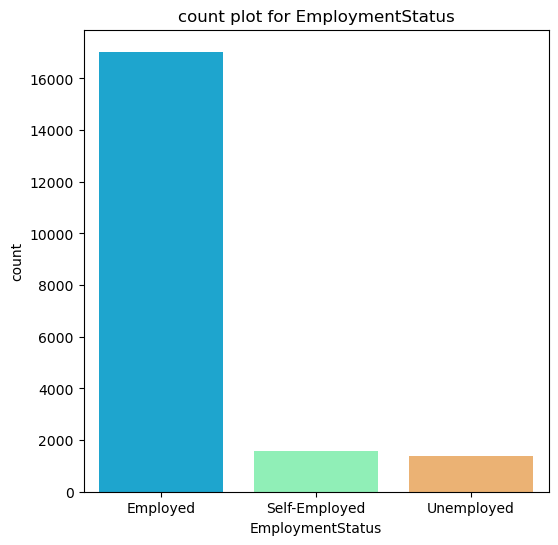

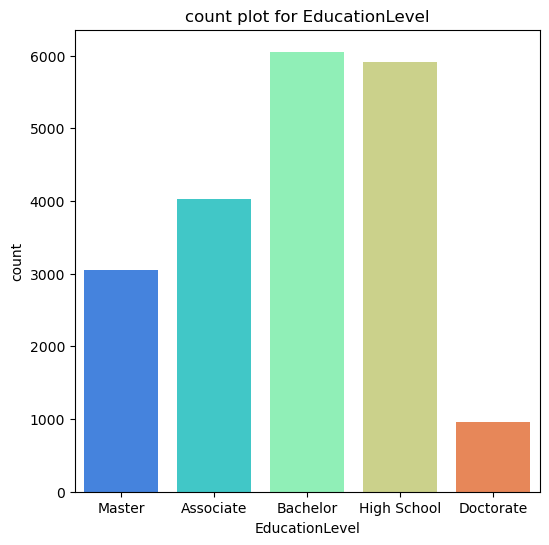

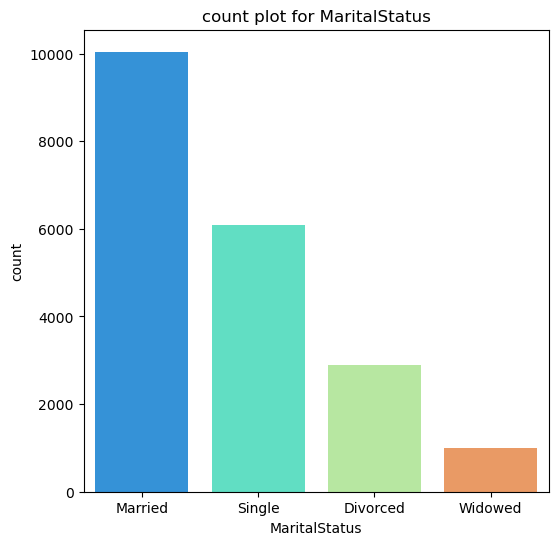

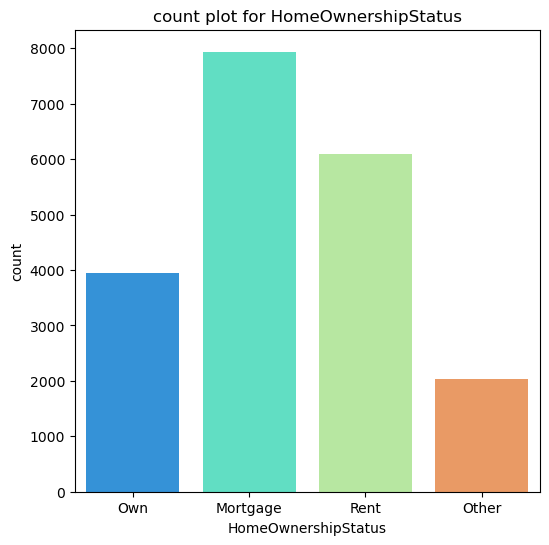

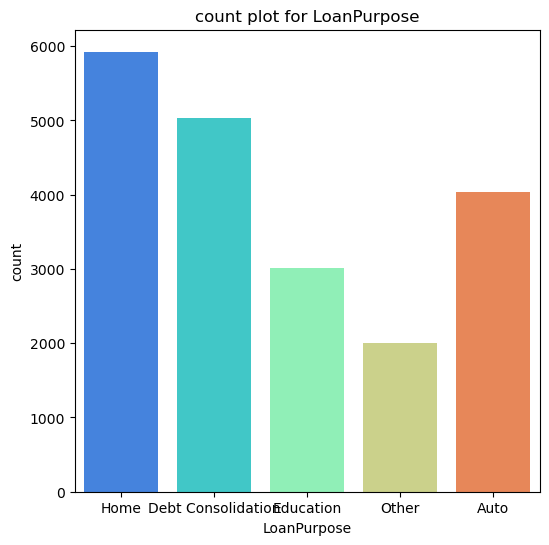

In [10]:
categorical_columns= loan_df.select_dtypes(include=["object","category"]).columns.tolist()
for col in categorical_columns[1:]:
    plt.figure(figsize=(6,6))
    sns.countplot(data=loan_df,x=col,hue=col,palette="rainbow")
    plt.title(f"count plot for {col}")
    plt.show()

Most of the loan needed persons are 

    * Employed

    * Married

    * Comparatively less educated
    
    * Need loan for building home

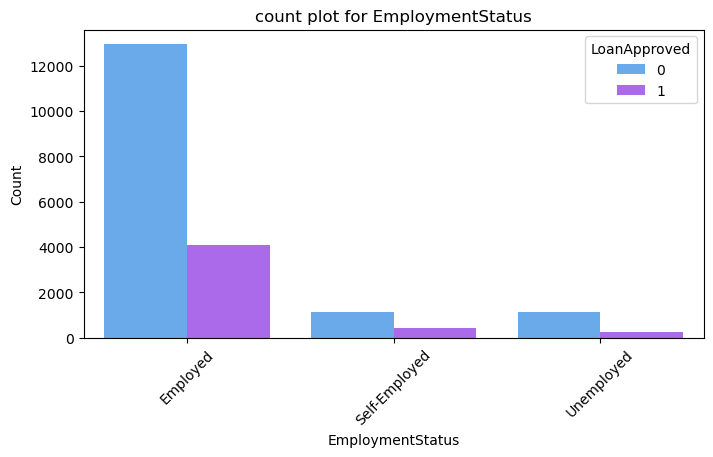

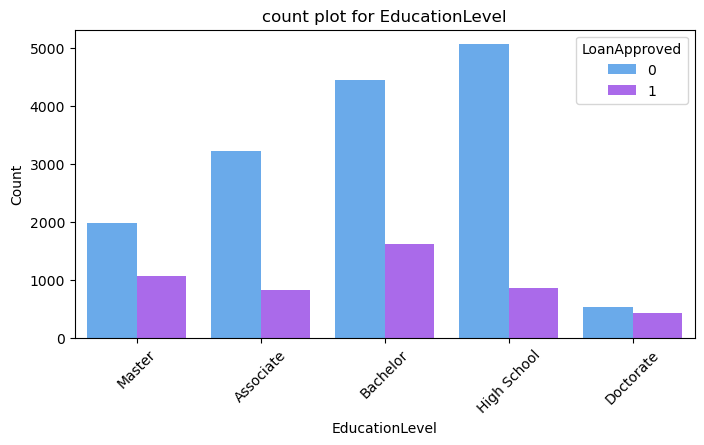

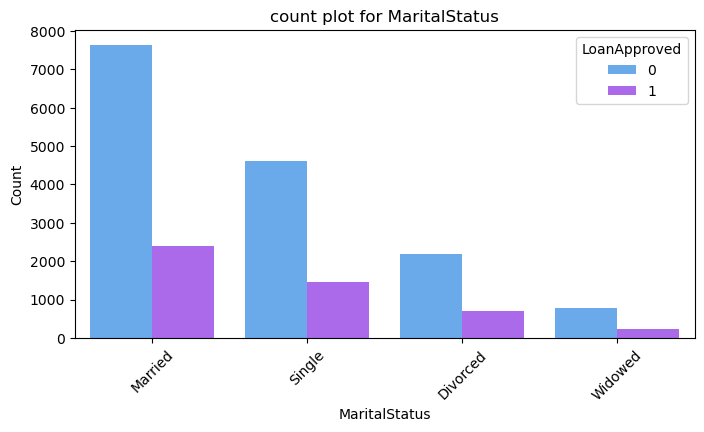

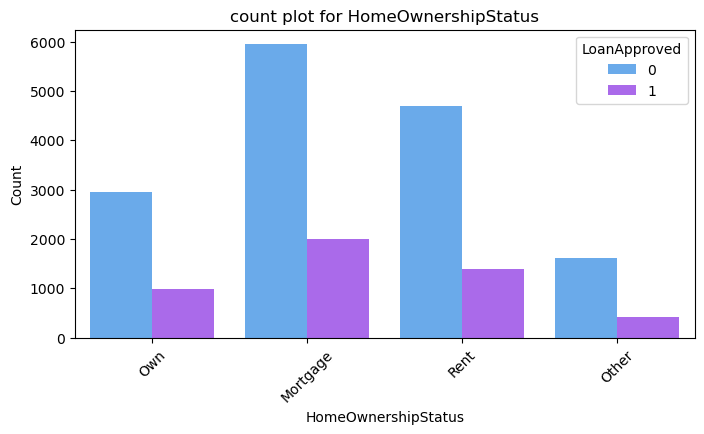

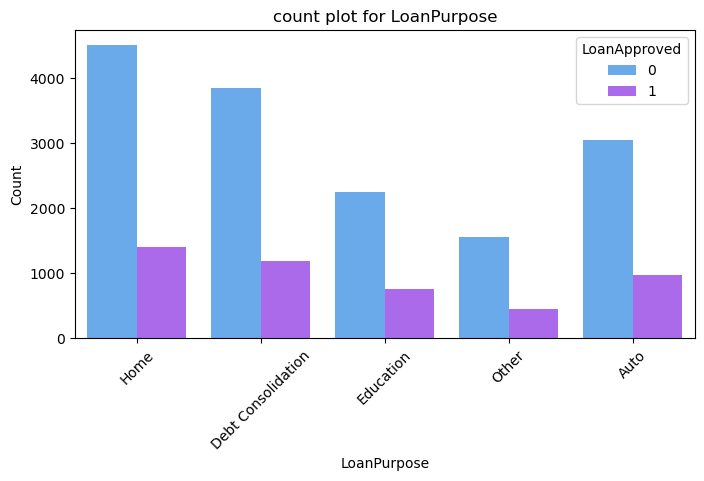

In [11]:

for col in categorical_columns[1:]:
    plt.figure(figsize=(8,4))
    sns.countplot(data=loan_df,x=col,hue="LoanApproved",palette="cool")
    plt.title(f"count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

majority of loan requenst are rejected in all categories(the migth be some other reason affecting the riskscore).

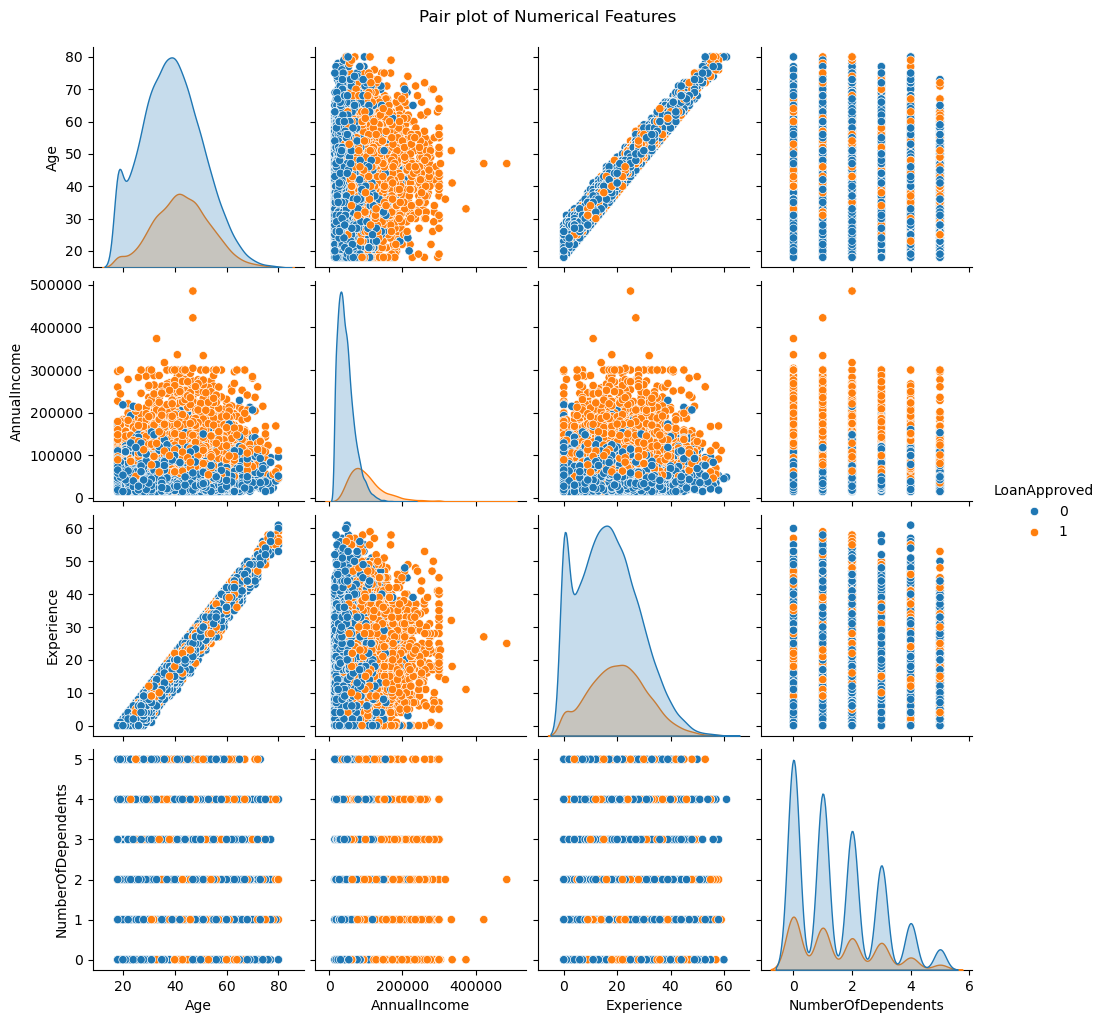

In [12]:
sns.pairplot(loan_df[["Age","AnnualIncome","Experience",
                      "NumberOfDependents","LoanApproved"]],hue="LoanApproved")
plt.suptitle("Pair plot of Numerical Features",y=1.02)
plt.show()

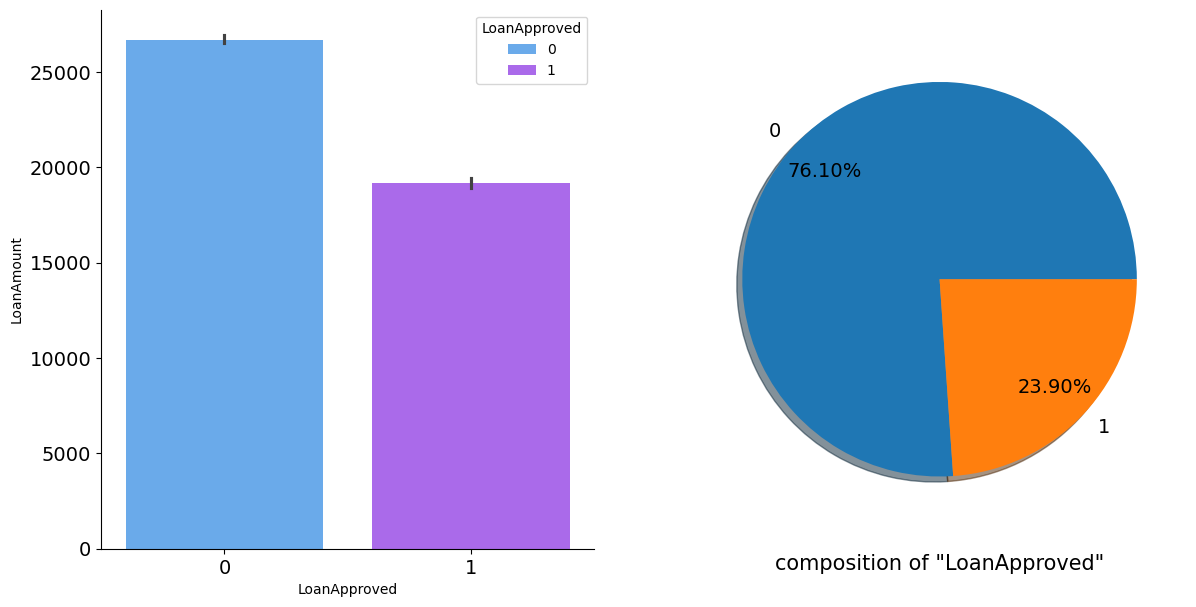

In [13]:
#cheking the target
plt.figure(figsize=(14,7))
# barplot
ax1=plt.subplot(1,2,1)
cp= sns.barplot(x="LoanApproved",y="LoanAmount",data=loan_df,
                palette="cool",hue="LoanApproved")
ax1.set_xlabel("LoanApproved")
ax1.set_ylabel("LoanAmount")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

# pieplot
ax2=plt.subplot(1,2,2)
plt.pie(x=loan_df["LoanApproved"].value_counts(),
        labels=list(loan_df['LoanApproved'].unique()),
        autopct="%2.2f%%",
        pctdistance=0.8,
        shadow=True,
        textprops={"fontsize":14})
ax2.set_xlabel(" ")
plt.xlabel('composition of "LoanApproved"', fontsize=15, labelpad=20)
plt.show()

Data Cleaning

In [14]:
loan_df.duplicated().sum()

0

In [15]:
loan_df.isna().sum().sum()

0

## feature engineering

In [ ]:
loan_df['BankBalance']=loan_df['SavingsAccountBalance']+loan_df['CheckingAccountBalance']

loan_df.drop('SavingsAccountBalance',axis=1,inplace=True)
loan_df.drop('CheckingAccountBalance',axis=1,inplace=True)

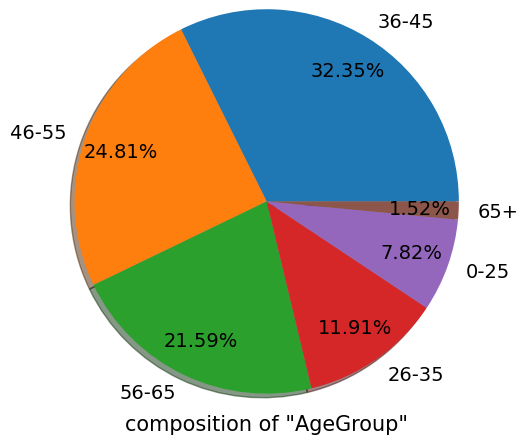

In [17]:
#Age Bimming
loan_df['AgeGroup']=pd.cut(loan_df["Age"],bins=[0,25,35,45,55,65,100],
                           labels=["0-25","26-35","36-45","46-55","56-65","65+"])

plt.pie(x=loan_df["AgeGroup"].value_counts(),
labels=list(loan_df["AgeGroup"].unique()),
autopct="%2.2f%%",
pctdistance=0.8,
shadow=True,
radius=1.3,
textprops={"fontsize":14})
plt.xlabel('composition of "AgeGroup"', fontsize=15, labelpad=20)   
plt.show()

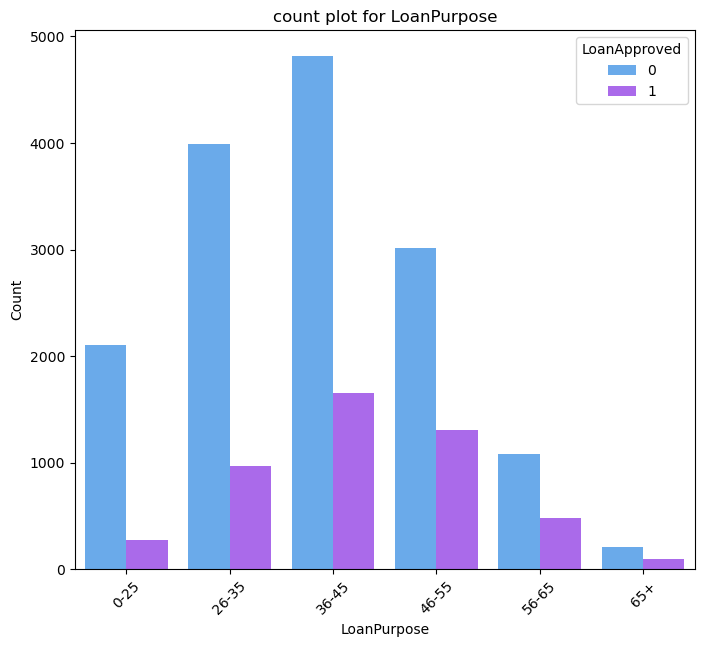

In [18]:
plt.figure(figsize=(8,7))
sns.countplot(data=loan_df,x="AgeGroup",hue="LoanApproved",palette="cool")
plt.title(f"count plot for {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [19]:
loan_df.drop('AgeGroup',axis=1,inplace=True)

In [20]:
loan_df[['year','month',"day"]]= loan_df["ApplicationDate"].str.split(
    '-',expand=True
)

loan_df["year"]= loan_df["year"].astype(int)
loan_df["month"]=loan_df['month'].astype(int)
loan_df['day']=loan_df['day'].astype(int)

loan_df[['ApplicationDate',"year","month",'day']]

,ApplicationDate,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [21]:
#THE ApplicationDate feature have errors. so drop it

loan_df.drop(['ApplicationDate',"year","month","day"],axis=1, inplace=True)

In [22]:
loan_df

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,8834
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,8087
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,1781
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,2892
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,6536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,Employed,High School,19,24521,36,Married,3,...,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,3664
19996,56,49246,567,Employed,Associate,33,25818,36,Married,5,...,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,7093
19997,44,48958,645,Employed,Bachelor,20,37033,72,Married,3,...,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,2921
19998,60,41025,560,Employed,High School,36,14760,72,Married,3,...,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,3297


## (2.3)Encoding

In [23]:
categorical_columns=loan_df.select_dtypes(include=['object','category']).columns.tolist()
print('categorical_columns:',categorical_columns)

categorical_columns: ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


## (2.3.1) ordinal Data

many ml models,like decision trees and regression models,rely on the relative order of numerical values.by manually assingning meaningful numbers,the model can better capture the relationship between the ordinal categories

In [24]:
loan_df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [25]:
loan_df['EmploymentStatus'].nunique()

3

In [26]:
loan_df['EmploymentStatus']=loan_df["EmploymentStatus"].map({'Unemployed':0,'Self-Employed':1,'Employed':2})

In [27]:
loan_df['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [28]:
loan_df['EducationLevel']=loan_df["EducationLevel"].map({'High School':0,
                                                         'Associate':1,
                                                         'Bachelor':2,
                                                         'Master':3,
                                                         'Doctorate':4})

In [29]:
loan_df['EducationLevel'].nunique()

5

## (2.3.2) LabelEncoding

In [ ]:
label_encoder=LabelEncoder()
loan_df["MaritalStatus"]=label_encoder.fit_transform(loan_df["MaritalStatus"])

In [31]:
loan_df["MaritalStatus"].unique()

array([1, 2, 0, 3])

In [ ]:
label_encoder=LabelEncoder()
loan_df["HomeOwnershipStatus"]=label_encoder.fit_transform(loan_df["HomeOwnershipStatus"])

In [33]:
loan_df["HomeOwnershipStatus"].unique()

array([2, 0, 3, 1])

In [ ]:
label_encoder=LabelEncoder()
loan_df["LoanPurpose"]=label_encoder.fit_transform(loan_df["LoanPurpose"])


In [35]:
loan_df["LoanPurpose"].unique()

array([3, 1, 2, 4, 0])

In [36]:
#le=LabelEncoder()
#for col in loan_df.select_dtypes(include=['object']).columns:
#   loan_df[cols]=le.fit_transform(loan_df[cols])

In [37]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  int32  
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int32  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

# (3) DataTranformation

## (3.1) Skewed Data

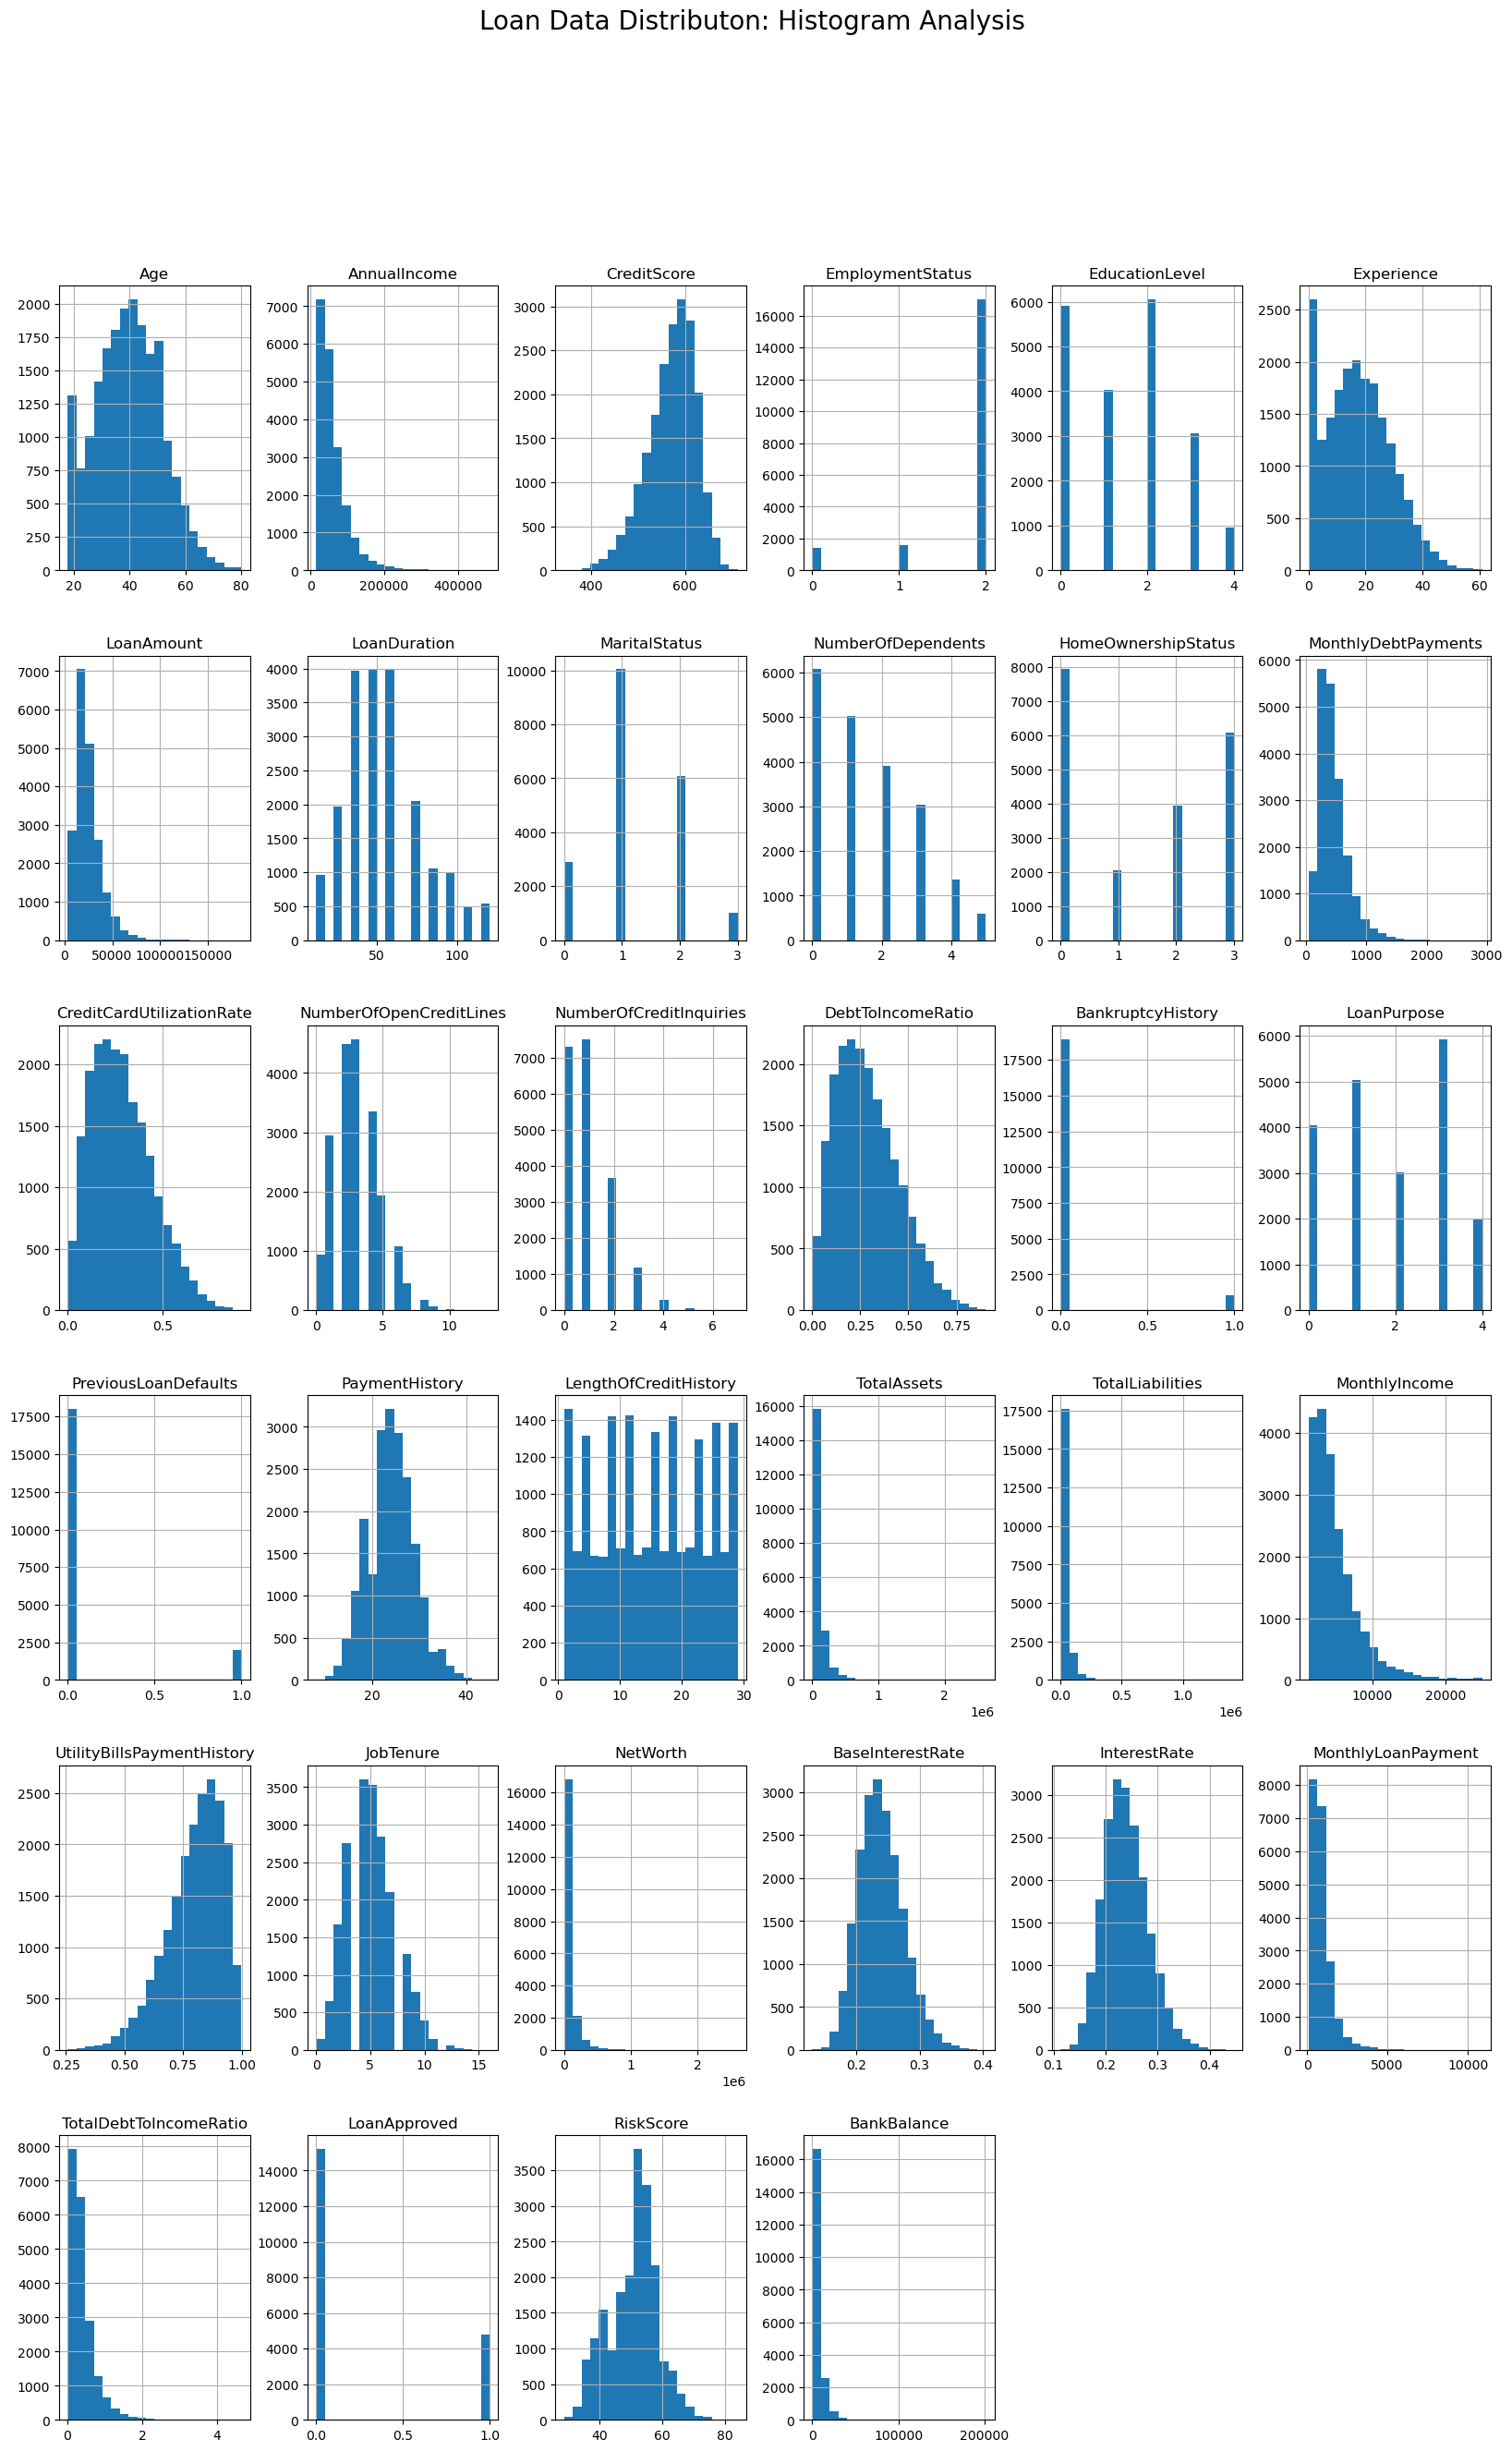

In [38]:
loan_df.hist(bins=20, figsize=(20,30))
plt.suptitle("Loan Data Distributon: Histogram Analysis",fontsize=20)
plt.show()

In [39]:
# Calculate skewness for each column
skewness= loan_df.skew()

#sort the skewness values in ascendin order
sorted_skewnwss=skewness.sort_values(ascending=True)

#Display the sorted skewness values
print(sorted_skewnwss)


EmploymentStatus             -2.455244
UtilityBillsPaymentHistory   -0.846234
CreditScore                  -0.596727
RiskScore                    -0.162062
LengthOfCreditHistory         0.002989
LoanPurpose                   0.025237
HomeOwnershipStatus           0.071497
Age                           0.185964
MaritalStatus                 0.202967
PaymentHistory                0.213465
EducationLevel                0.273155
Experience                    0.339981
JobTenure                     0.436452
BaseInterestRate              0.461850
InterestRate                  0.485491
DebtToIncomeRatio             0.593858
NumberOfOpenCreditLines       0.599662
CreditCardUtilizationRate     0.601131
NumberOfDependents            0.639919
LoanDuration                  0.651330
NumberOfCreditInquiries       1.012065
LoanApproved                  1.224086
MonthlyDebtPayments           1.653435
LoanAmount                    1.833688
MonthlyIncome                 1.992929
AnnualIncome             

In [40]:
# create a copy of the original data for comparison

loan_df_copy=loan_df.copy()

#log Transformation of skewed columns (eg., AnnualIncome, LoanAmount)
loan_df['AnnualIncom']=np.log1p(loan_df['AnnualIncome']) # LOG(1 + X) TO handle skew
loan_df['LoanAmount']=np.log1p(loan_df['LoanAmount'])

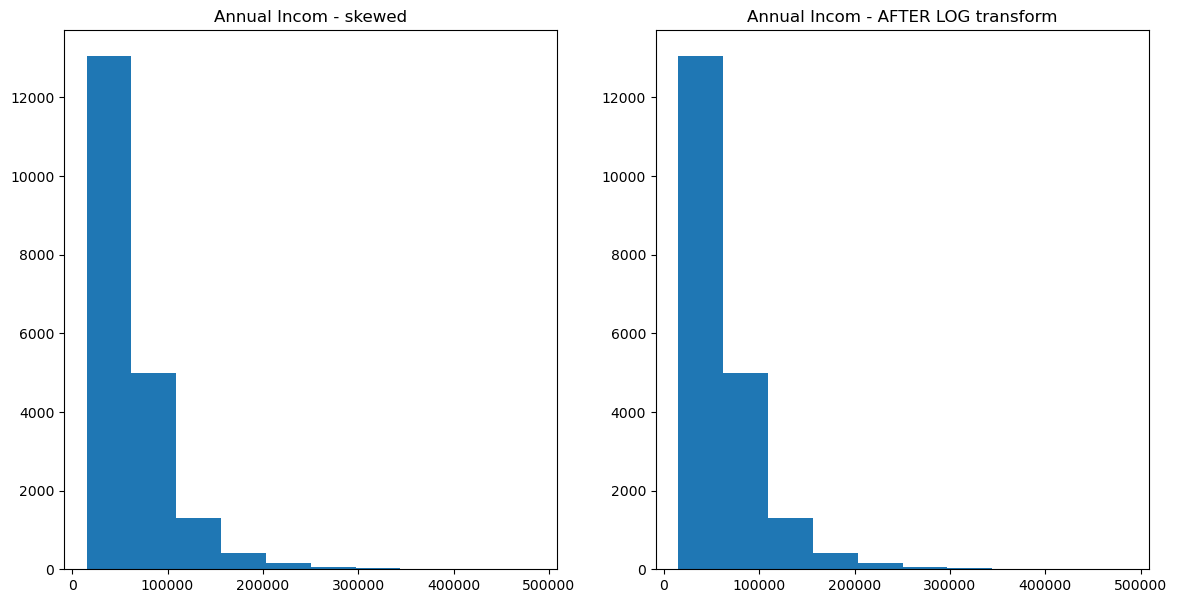

In [41]:
plt.figure(figsize=(14,7))


ax1=plt.subplot(1,2,1)
cp=plt.hist(loan_df_copy['AnnualIncome'])
plt.title("Annual Incom - skewed")

ax2=plt.subplot(1,2,2)
plt.hist(loan_df['AnnualIncome'])
plt.title('Annual Incom - AFTER LOG transform')
plt.show()

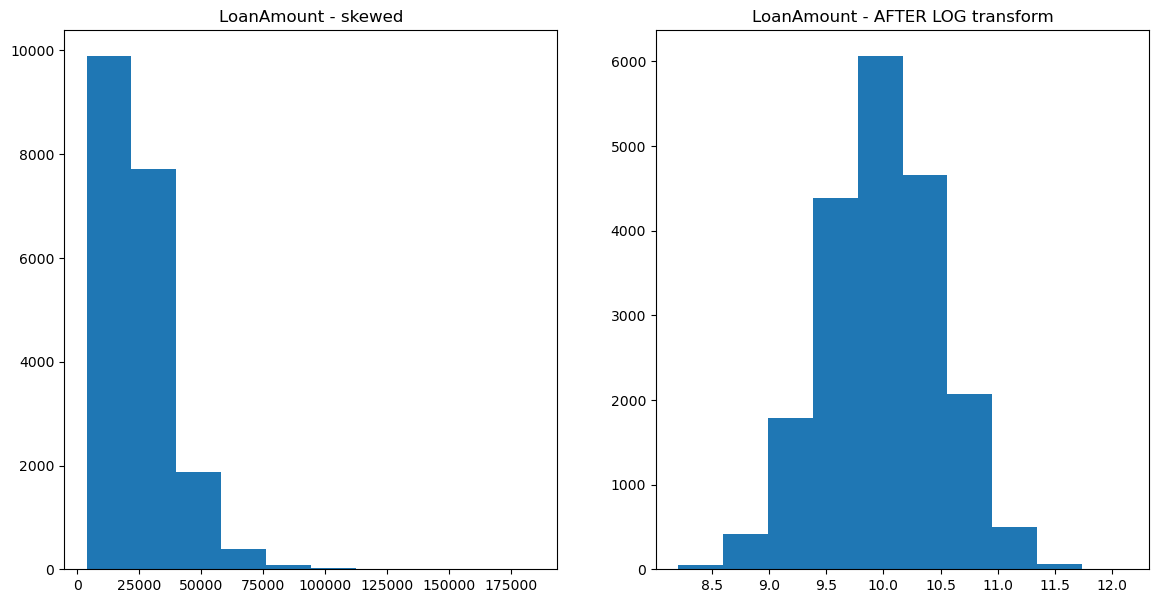

In [42]:
plt.figure(figsize=(14,7))


ax1=plt.subplot(1,2,1)
cp=plt.hist(loan_df_copy['LoanAmount'])
plt.title("LoanAmount - skewed")

ax2=plt.subplot(1,2,2)
plt.hist(loan_df['LoanAmount'])
plt.title('LoanAmount - AFTER LOG transform')
plt.show()

In [43]:
# step 1: select numerical columns,excluding 'LoanApproval'
numeric_columns=loan_df.drop(columns=['LoanApproved']).select_dtypes(include=['number'])

#step 2: calculate skewness for numeric columns
skewness= numeric_columns.skew()

#step 3: identify colums with high skewness (threshold > 1 or < -1)
highly_skewd_columns= skewness[abs(skewness) >1].index

#step 4: Apply log transformation using np.log1p() for columns with high skewness
for col in highly_skewd_columns:
    #create a new column with log-transformed values
    loan_df[col]=np.log1p(loan_df[col])

#check transformed columns
loan_df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance,AnnualIncom
0,45,10.595359,617,1.098612,3,22,9.484405,48,1,2,...,11,11.751383,0.199652,0.227590,6.042172,0.166427,0,49.0,9.086476,10.595359
1,38,10.589358,628,1.098612,1,15,10.167619,48,2,1,...,3,10.683042,0.207045,0.201077,6.678410,0.329198,0,52.0,8.998137,10.589358
2,47,10.614597,570,1.098612,2,26,9.777244,36,1,2,...,6,8.557567,0.217627,0.212548,6.503400,0.379913,0,52.0,7.485492,10.614597
3,58,11.143093,545,1.098612,0,34,10.542680,96,2,1,...,5,11.507440,0.300398,0.300911,6.955123,0.272389,0,54.0,7.970049,11.143093
4,37,11.545054,594,1.098612,1,17,9.125327,36,1,1,...,5,12.332793,0.197184,0.175990,5.802659,0.067855,1,36.0,8.785234,11.545054


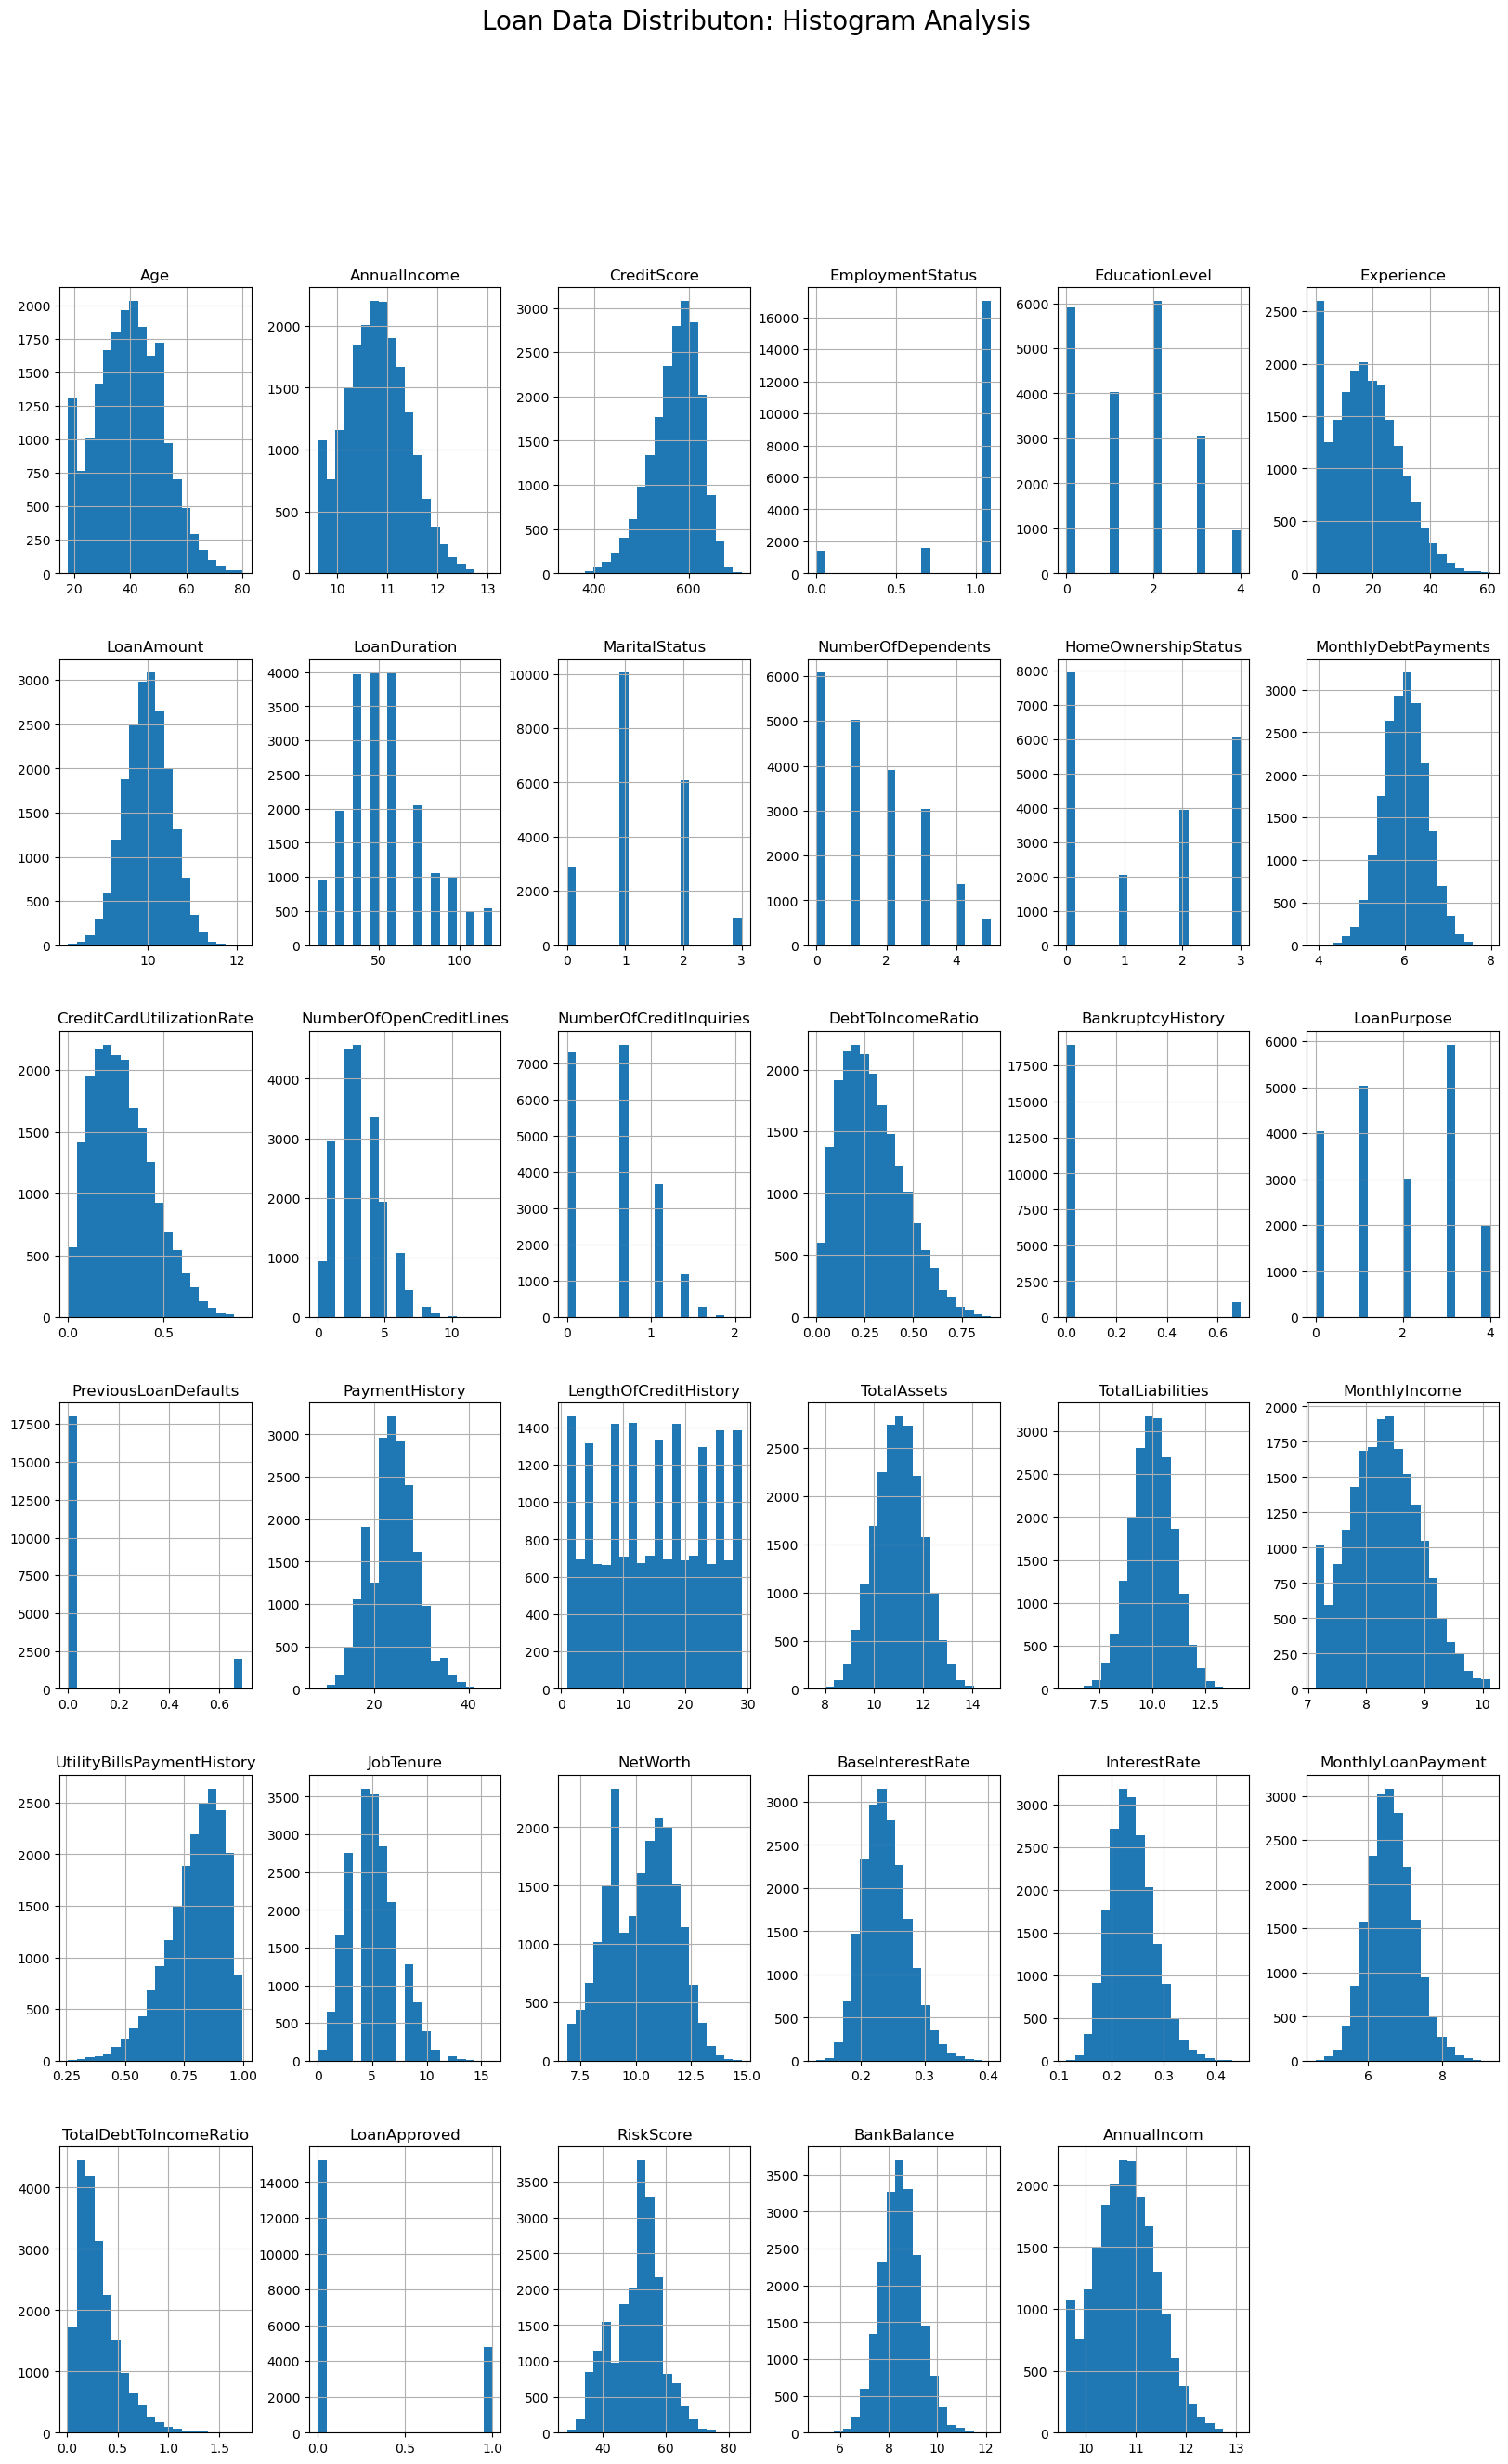

In [44]:
loan_df.hist(bins=20, figsize=(20,30))
plt.suptitle("Loan Data Distributon: Histogram Analysis",fontsize=20)
plt.show()

## (3.2) Removing Unwanted features


### (3.2.1) Based on Correlation
 After analyzing correlation, you can remove:

 * One among two higly correlated features (between features themselves).


 * features with low correlation with the target variable.

<Axes: >

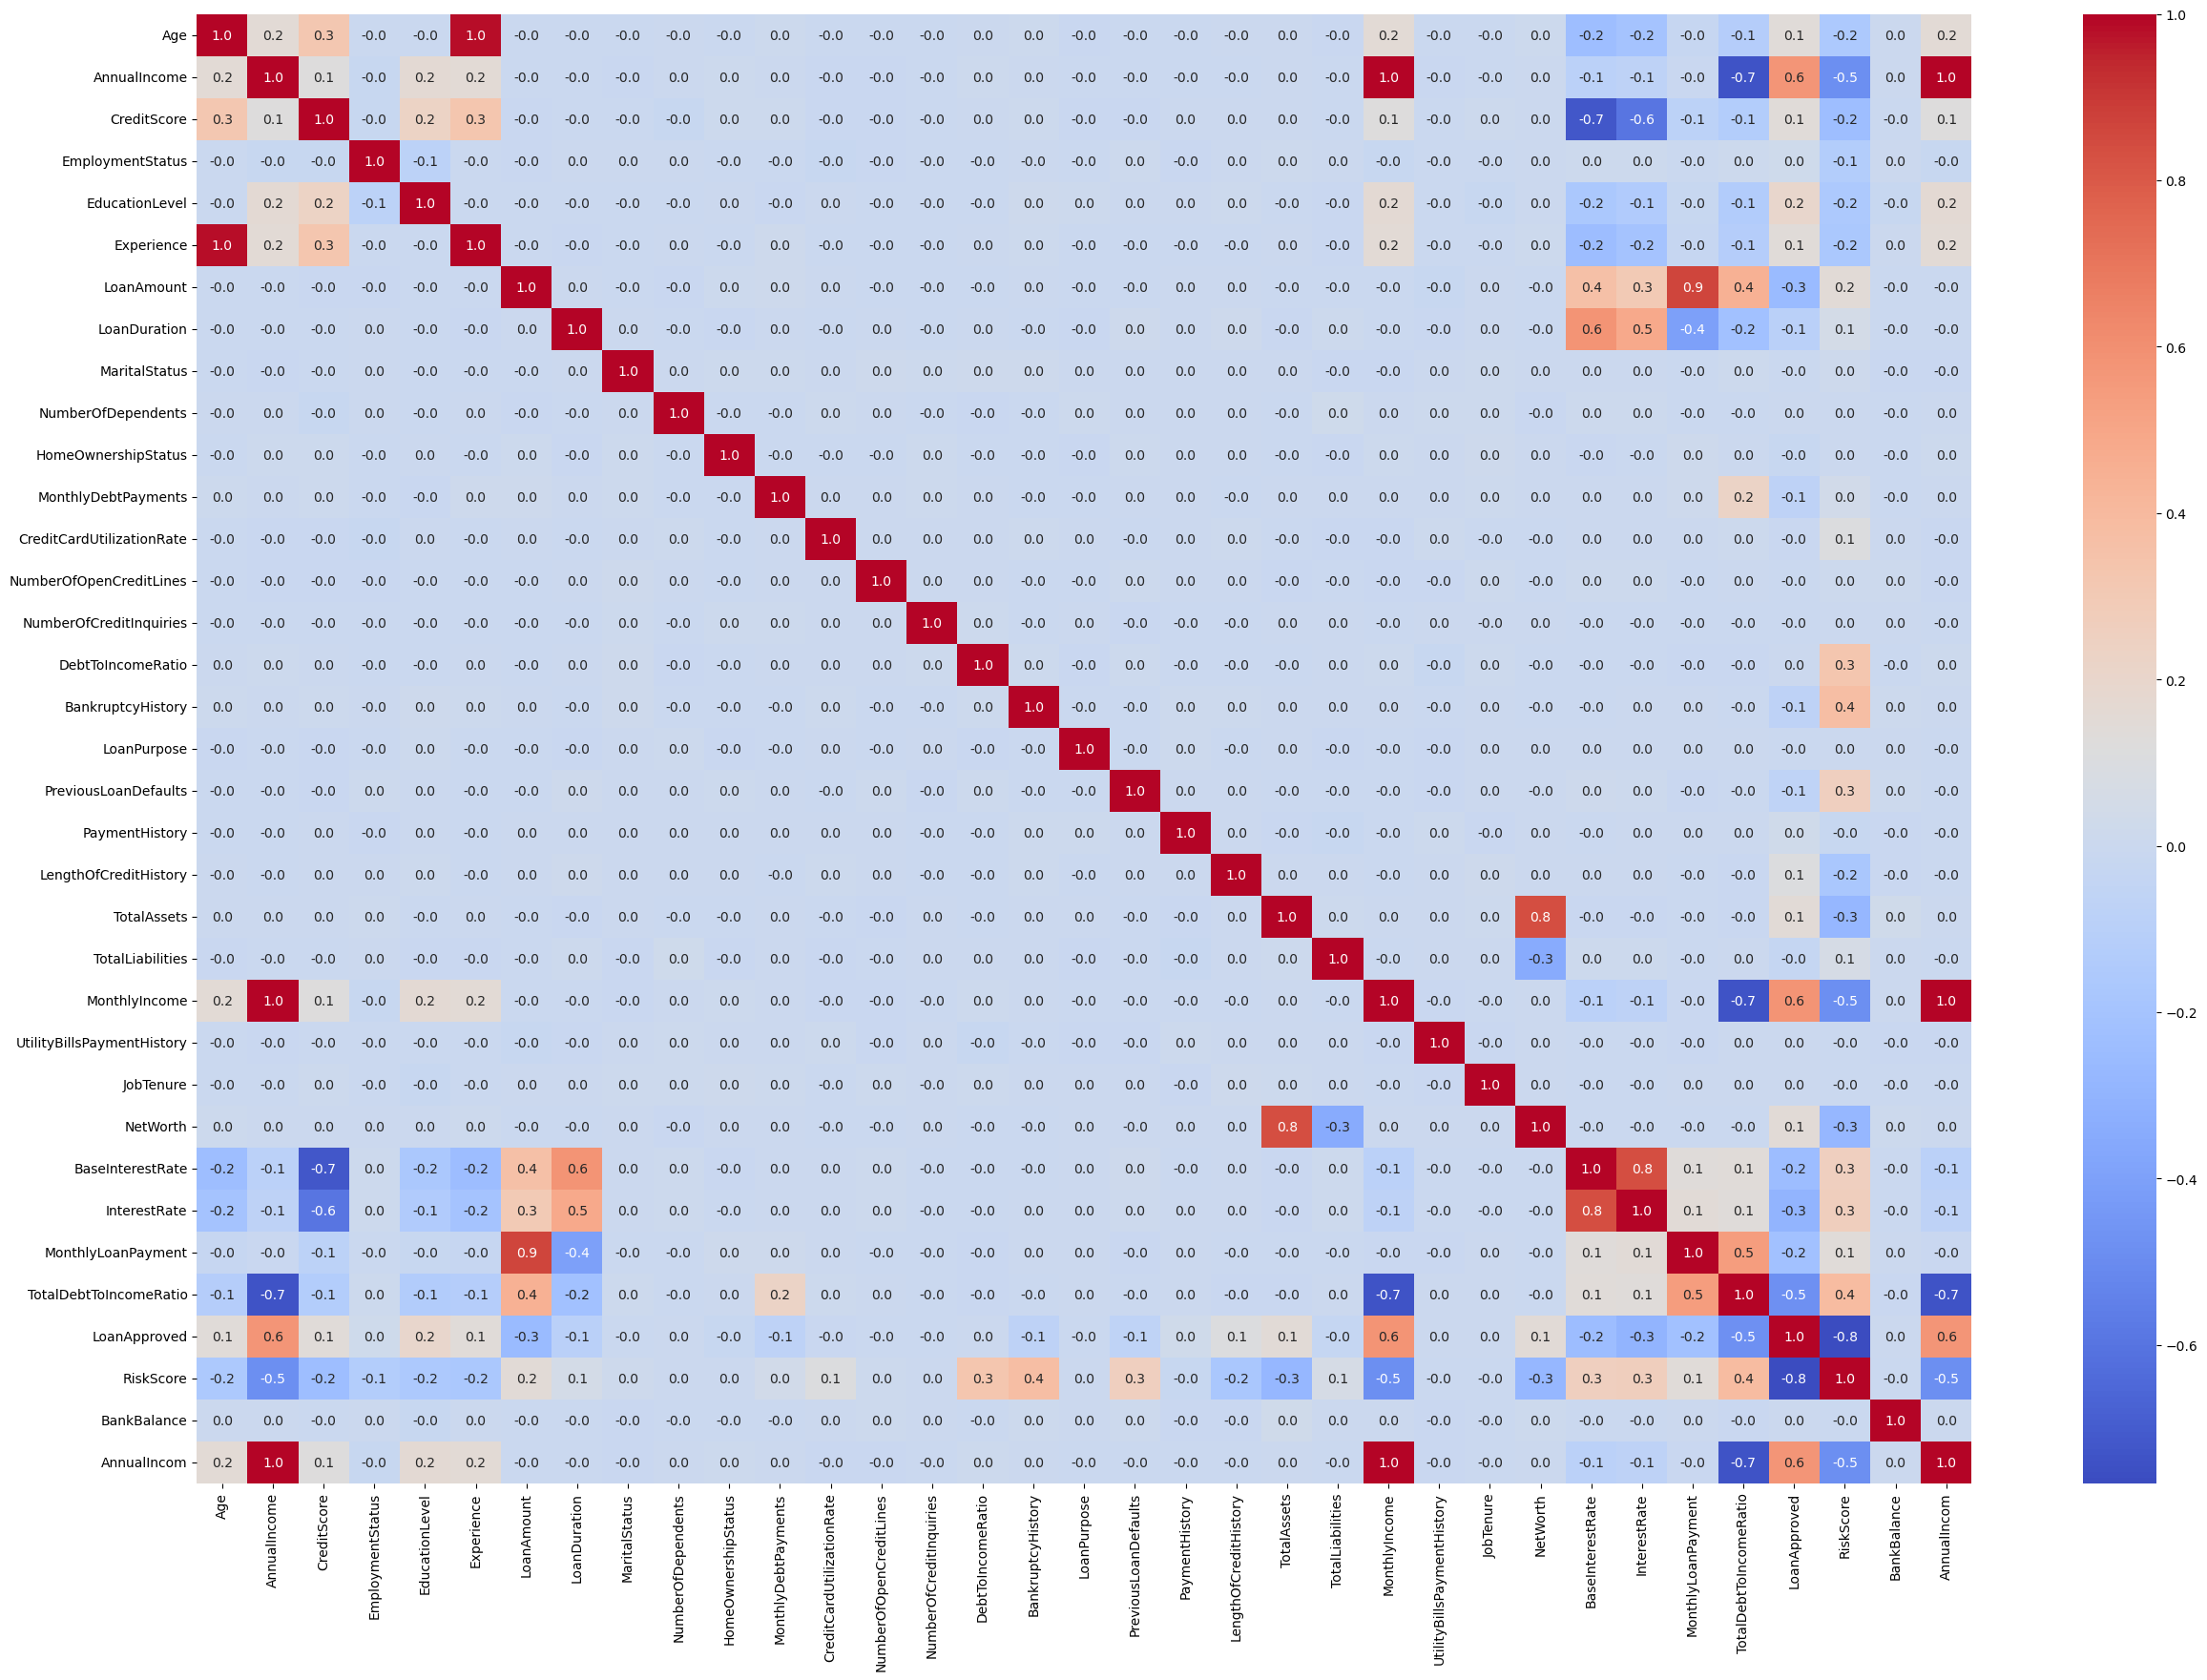

In [45]:
plt.figure(figsize=(30,20))
loan_df.corr(numeric_only=True)
sns.heatmap(loan_df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f')

In [46]:
loan_df.corr()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance,AnnualIncom
Age,1.000000,0.156663,0.323243,-0.002852,-0.001970,0.982980,-0.005580,-0.006992,-0.005489,-0.000287,...,-0.000773,0.006656,-0.238995,-0.202702,-0.027758,-0.123050,0.141029,-0.164304,0.005178,0.156663
AnnualIncome,0.156663,1.000000,0.117193,-0.015064,0.159894,0.158160,-0.005187,-0.001902,-0.008096,0.001024,...,-0.001671,0.003253,-0.087288,-0.075183,-0.010119,-0.733132,0.577045,-0.484203,0.005291,1.000000
CreditScore,0.323243,0.117193,1.000000,-0.016420,0.230306,0.327664,-0.009231,-0.000762,-0.000507,-0.014453,...,0.008069,0.001043,-0.722619,-0.598844,-0.080825,-0.125033,0.142000,-0.240198,-0.005228,0.117193
EmploymentStatus,-0.002852,-0.015064,-0.016420,1.000000,-0.081362,-0.002586,-0.010498,0.000028,0.002613,0.003093,...,-0.005920,0.005386,0.007858,0.007840,-0.006754,0.007624,0.024961,-0.130817,0.005587,-0.015064
EducationLevel,-0.001970,0.159894,0.230306,-0.081362,1.000000,-0.001128,-0.000765,-0.002447,-0.001940,-0.004994,...,-0.016901,0.001854,-0.167695,-0.139859,-0.015631,-0.133575,0.194434,-0.164848,-0.015996,0.159894
Experience,0.982980,0.158160,0.327664,-0.002586,-0.001128,1.000000,-0.005393,-0.007924,-0.004426,0.000136,...,-0.000762,0.006633,-0.242871,-0.206252,-0.027939,-0.123991,0.140755,-0.166496,0.006080,0.158160
LoanAmount,-0.005580,-0.005187,-0.009231,-0.010498,-0.000765,-0.005393,1.000000,0.000126,-0.005475,-0.009104,...,0.001044,-0.002563,0.360816,0.302460,0.862680,0.444596,-0.259575,0.151177,-0.002476,-0.005187
LoanDuration,-0.006992,-0.001902,-0.000762,0.000028,-0.002447,-0.007924,0.000126,1.000000,0.003906,-0.001301,...,0.003635,-0.005524,0.579215,0.487994,-0.404565,-0.218800,-0.094558,0.054550,-0.006214,-0.001902
MaritalStatus,-0.005489,-0.008096,-0.000507,0.002613,-0.001940,-0.004426,-0.005475,0.003906,1.000000,0.000954,...,0.006668,0.005394,0.002563,0.003604,-0.005142,0.008430,-0.006828,0.016824,-0.011145,-0.008096
NumberOfDependents,-0.000287,0.001024,-0.014453,0.003093,-0.004994,0.000136,-0.009104,-0.001301,0.000954,1.000000,...,0.010910,-0.009468,0.006977,0.006749,-0.005865,-0.002420,0.001717,0.001686,-0.002764,0.001024


In [47]:
loan_df[['TotalDebtToIncomeRatio','MonthlyIncome']].corr()

# highly

,TotalDebtToIncomeRatio,MonthlyIncome
TotalDebtToIncomeRatio,1.000000,-0.736617
MonthlyIncome,-0.736617,1.000000


In [48]:
loan_df.drop('TotalDebtToIncomeRatio',axis=1,inplace=True)

In [49]:
correlation_matrix= loan_df.corr()

# set the correlation threshold
threshold=0.6

# Find pairs of feature with high correlation
highly_correlated_pairs= []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        #check if the absolute correlation exceeds the threshold
        if abs(correlation_matrix.iloc[i,j])> threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i],
                                            correlation_matrix.columns[j]))
        
#print all pairs of highly correlated features
print(highly_correlated_pairs)

[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets'), ('BaseInterestRate', 'CreditScore'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount'), ('RiskScore', 'LoanApproved'), ('AnnualIncom', 'AnnualIncome'), ('AnnualIncom', 'MonthlyIncome')]


features with a correlation value of 0.5 or higher (postive or negative) should be considered for removal,asa they sre highly correlated

In [50]:
loan_df.drop(['Experience','AnnualIncome','TotalAssets','BaseInterestRate','MonthlyLoanPayment'],axis=1,inplace=True)

In [51]:
# sTEP 1: CALCULATE the correlation of each feature with the target
corr_with_target= loan_df.corr()['LoanApproved'].sort_values(ascending=False)

# step 2: set the threshold for low correlation(-0.05 to 0.05)
low_corr_features= corr_with_target[(corr_with_target >-0.05)&
                                           (corr_with_target <0.05)]

# step 3: print the list of features with low correlation
print("Features with low correlation between -0.05 and 0.05:")
print(low_corr_features)

Features with low correlation between -0.05 and 0.05:
PaymentHistory                0.030804
EmploymentStatus              0.024961
JobTenure                     0.004997
BankBalance                   0.004973
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
MaritalStatus                -0.006828
NumberOfCreditInquiries      -0.006837
LoanPurpose                  -0.007062
CreditCardUtilizationRate    -0.010466
HomeOwnershipStatus          -0.018135
TotalLiabilities             -0.033293
Name: LoanApproved, dtype: float64


In [52]:
#Below features are very less correlatod with target variable:
loan_df.drop(['JobTenure','UtilityBillsPaymentHistory','NumberOfDependents','DebtToIncomeRatio',
              'NumberOfCreditInquiries','NumberOfOpenCreditLines','LoanPurpose','MaritalStatus'],axis=1,inplace=True)

In [53]:
# sTEP 1: CALCULATE the correlation of each feature with the target
corr_with_target= loan_df.corr()['RiskScore'].sort_values(ascending=False)

# step 2: set the threshold for low correlation(-0.05 to 0.05)
low_corr_features= corr_with_target[(corr_with_target >-0.05)&
                                           (corr_with_target <0.05)]

# step 3: print the list of features with low correlation
print("Features with low correlation between -0.05 and 0.05:")
print(low_corr_features)

Features with low correlation between -0.05 and 0.05:
MonthlyDebtPayments    0.037533
HomeOwnershipStatus    0.004454
BankBalance           -0.001408
PaymentHistory        -0.016992
Name: RiskScore, dtype: float64


In [54]:
loan_df.drop(['MonthlyDebtPayments','HomeOwnershipStatus','PaymentHistory','BankBalance'],axis=1,inplace=True)

In [55]:
loan_df.drop(['LoanDuration','EducationLevel',"Age"],axis=1,inplace=True)

In [56]:
loan_df.columns

Index(['CreditScore', 'EmploymentStatus', 'LoanAmount',
       'CreditCardUtilizationRate', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalLiabilities',
       'MonthlyIncome', 'NetWorth', 'InterestRate', 'LoanApproved',
       'RiskScore', 'AnnualIncom'],
      dtype='object')

### (3.2.2) PCA


In [57]:
from sklearn.decomposition import PCA
pca= PCA(n_components=5)
loan_pca=pca.fit_transform(loan_df)

#create a DataFrame with the PCA results
loan_pca_df=pd.DataFrame(loan_pca,
                         columns=[f'PC{i+1}' for i in range (loan_pca.shape[1])])

# Now loan_pca_final_df contains the  data along with the componets
loan_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-45.414832,5.118274,-3.165243,-1.390941,-0.488763
1,-56.294723,6.879361,-0.186114,-0.861891,0.516636
2,1.651199,-5.424550,4.711327,2.085330,-1.061187
3,26.718993,5.341789,-0.686901,-1.700715,0.935621
4,-22.940673,-17.487515,-6.039795,-1.234131,-0.297011


# (3.3) Scaling


## (3.3.1) standardardization

In [58]:
# Creat  a copy of the orginal data for comparison
loan_scaled_df=loan_df.copy()

# Select numeric columns, excluding 'LoanApproved'
numeric_columns=loan_df.drop(columns=['LoanApproved']).select_dtypes(include=['number']).columns

#initialize the standardscaler
scaler=StandardScaler()

# Apply the scaler only to the numeric colums
loan_scaled_df[numeric_columns]=scaler.fit_transform(loan_df[numeric_columns])
loan_scaled_df.head()

,CreditScore,EmploymentStatus,LoanAmount,CreditCardUtilizationRate,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalLiabilities,MonthlyIncome,NetWorth,InterestRate,LoanApproved,RiskScore,AnnualIncom
0,0.890021,0.371144,-1.014008,0.425792,-0.235154,-0.333426,-0.711630,-0.136881,-0.324366,1.020941,-0.272968,0,-0.227149,-0.331806
1,1.105724,0.371144,0.343015,-1.242602,-0.235154,-0.333426,-0.711630,-0.828648,-0.334247,0.287206,-0.901165,0,0.158551,-0.341640
2,-0.031618,0.371144,-0.432362,-0.932273,-0.235154,-0.333426,0.841287,1.765237,-0.292687,-1.172566,-0.629370,0,0.158551,-0.300276
3,-0.521852,0.371144,1.087972,-0.117617,-0.235154,-0.333426,-0.592175,-1.408173,0.577602,0.853401,1.464331,0,0.415684,0.565871
4,0.439006,0.371144,-1.727221,0.213746,-0.235154,-0.333426,1.438563,-0.240858,1.239575,1.420252,-1.495584,1,-1.898515,1.224641


$$x=\frac{x-\mu}{\sigma}$$

#### (3.4) Handling Outliers

boxplot

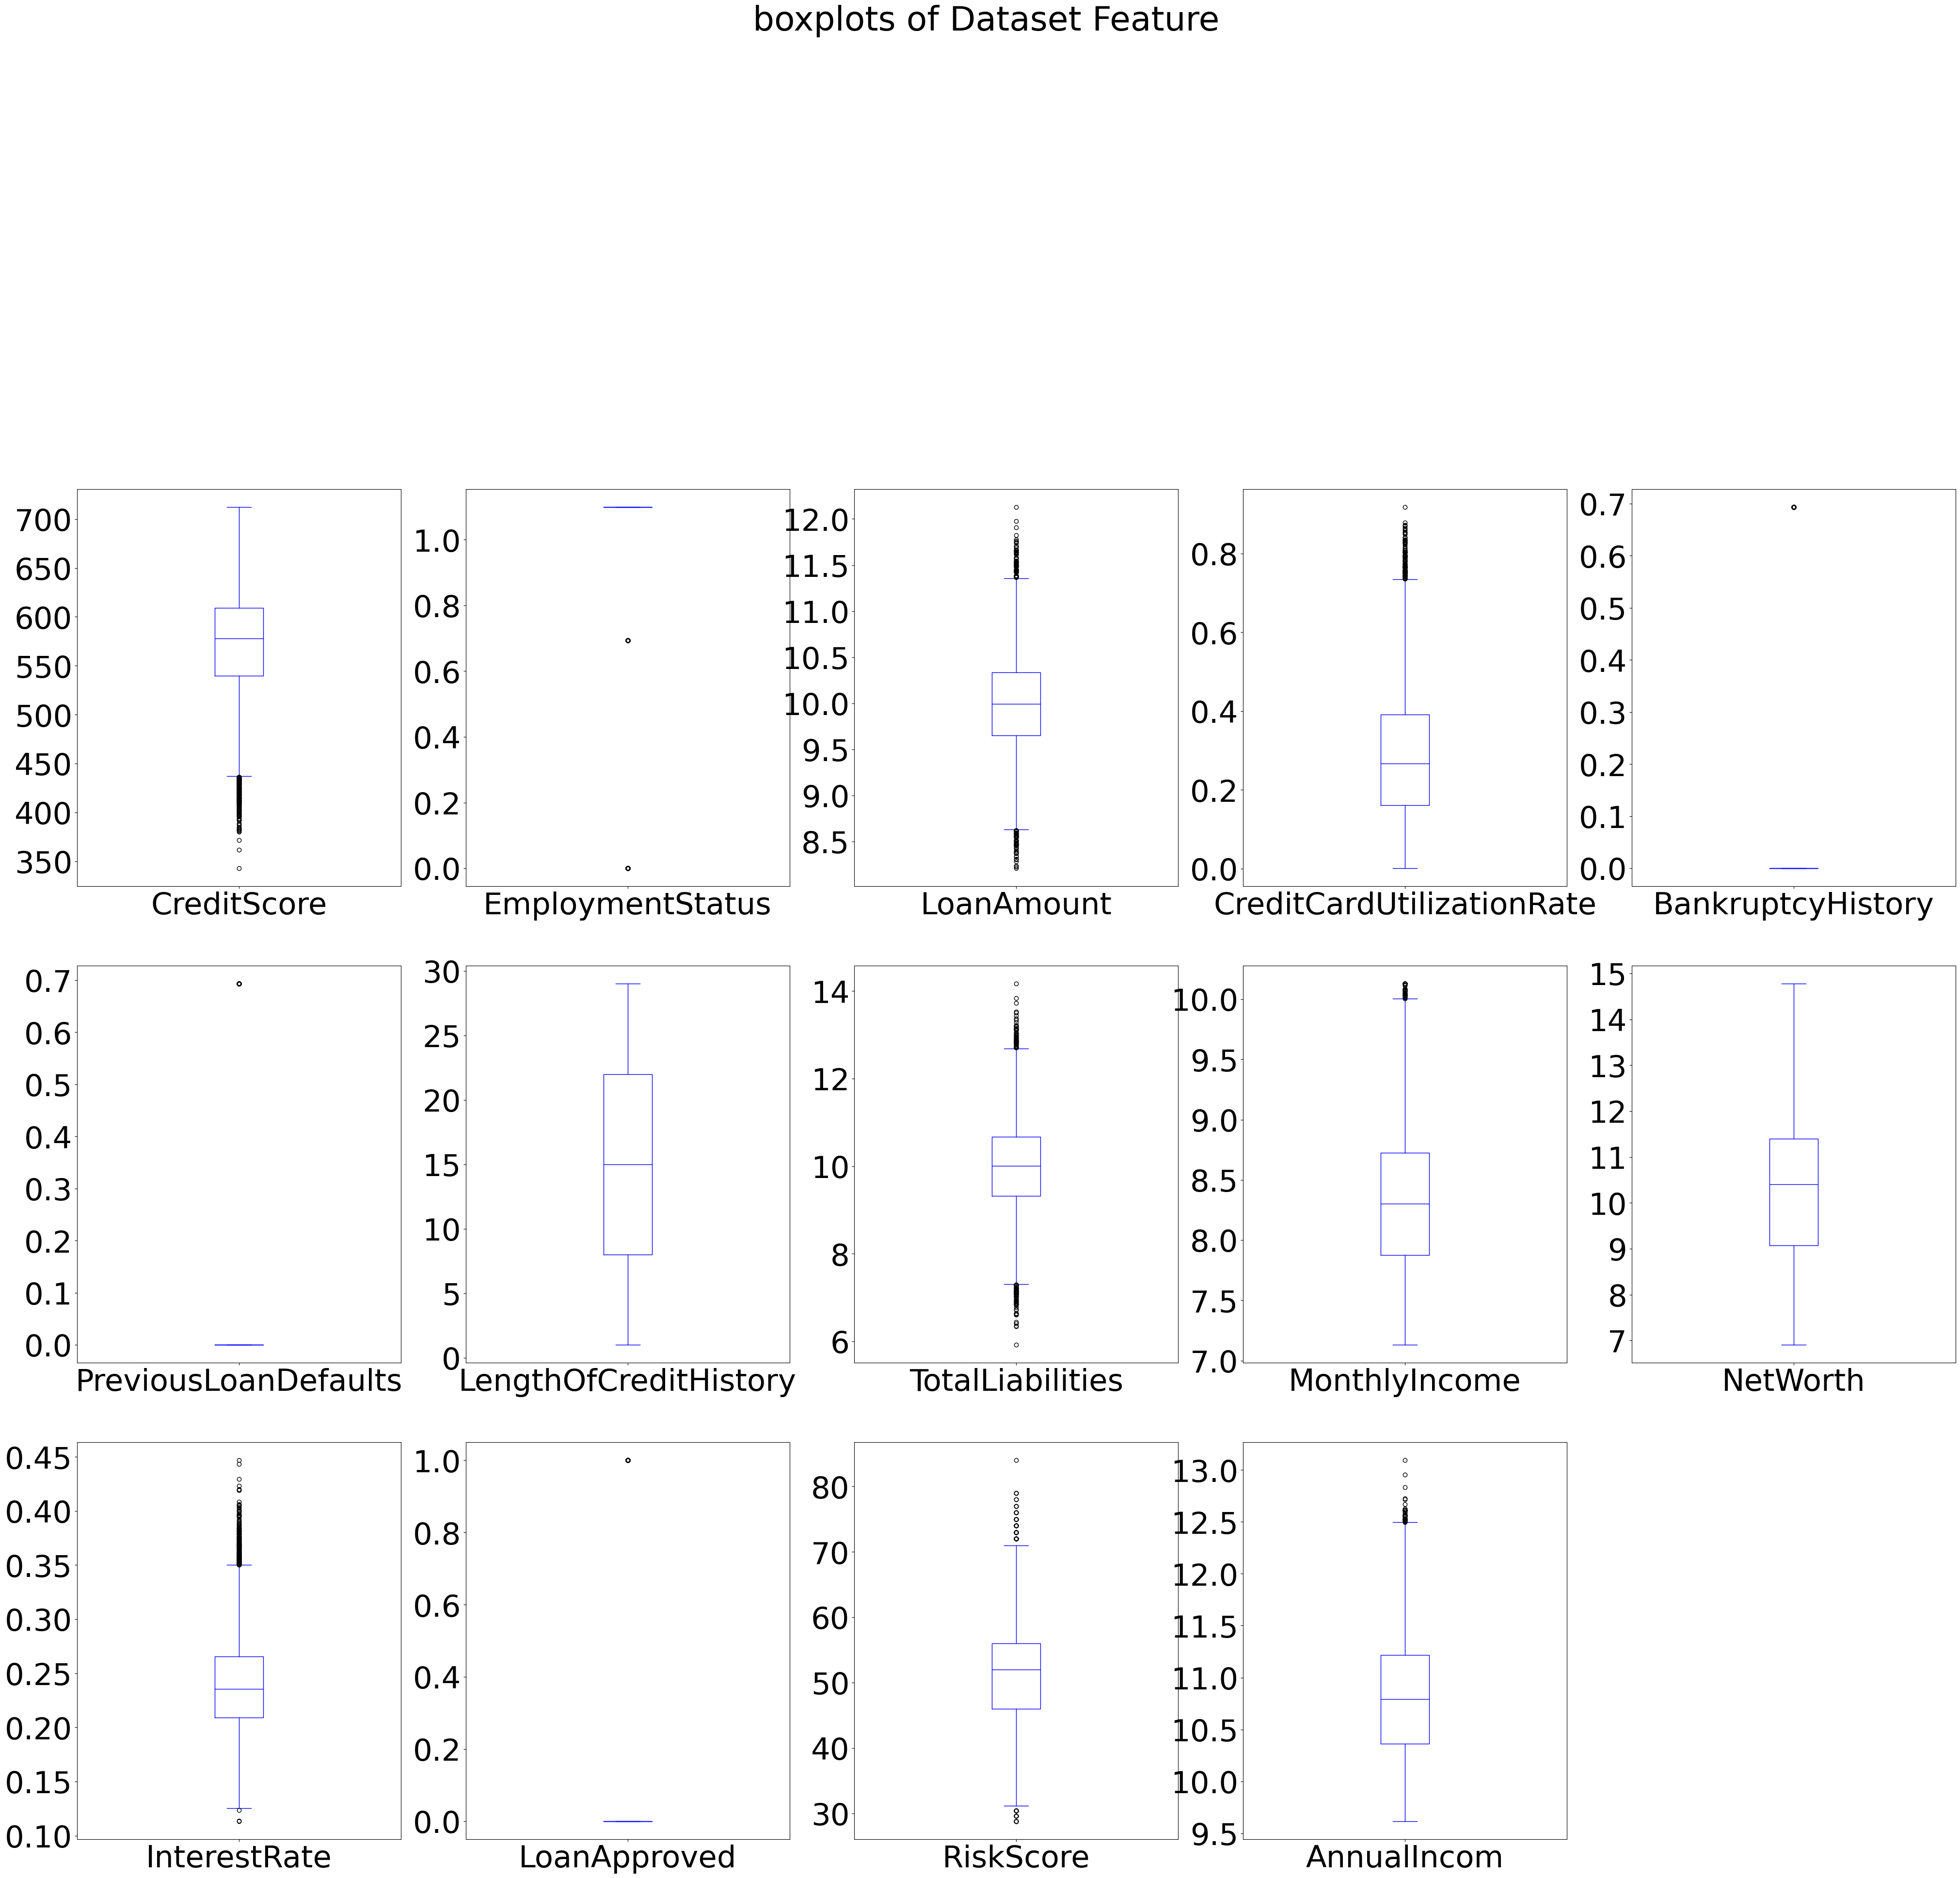

In [59]:
loan_df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='blue',fontsize=45)

plt.suptitle("boxplots of Dataset Feature",fontsize=50)
plt.show()

In [ ]:
# #Creat  a copy of the orginal data for comparison
# loan_scaled_df=loan_df.copy()

# def remove_outliers_iqr(df,exclude_columns):
#     #Loop through numeric colums
#     for column in df.select_dtypes(include=['number']):
#         if column in exclude_columns:
#             continue #skip exclude columns

#         Q1=df[column].quantile(0.25)
#         Q3=df[column].quantile(0.75)
#         IQR = Q3 -Q1

#         #Define outlire bounds
#         lower_bound=Q1 -1.5 *IQR
#         upper_bound=Q3 + 1.5 *IQR

#         #Filter out the outliers
#         df=df[(df[column]>= lower_bound)& (df[column]<=upper_bound)]

#     return df

# #Define the columns to exclude
# exclude_columns=['LoanApproved','RiskScore','EmploymentStatus']

# #Remove outlier
# loan_df= remove_outliers_iqr(loan_df, exclude_columns)

# #print shapes of data before and after removing outliers
# print('Shape of Data before removing outlies:',loan_df_copy.shape)
# print('Shape of Data after removing outlies:',loan_df.shape)
# print('Number of outliers removed:', loan_df_copy.shape[0]-loan_df.shape[0])


## (4.1) Classification Modeling

Binary Loan Approval Clasiffication: To determine the binary outcome of loan approval,indicating wheter an applicant is likly to be approved or denied for a loan

In [61]:
# convert 'LoanApproved' from float to int
loan_df['LoanApproved']=loan_df['LoanApproved'].astype('int')

x=loan_df.drop(['LoanApproved','RiskScore'],axis=1)
y=loan_df[['LoanApproved']]

In [62]:
loan_df[['LoanApproved']].value_counts()

LoanApproved
0               15220
1                4780
Name: count, dtype: int64

In [63]:
#for evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,confusion_matrix



from sklearn.model_selection import train_test_split

#for classification algorithms
from sklearn.linear_model import LogisticRegression 


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print('shape of training features',x_train.shape)
print('shape of testing features',x_test.shape)
print('shape of training target',y_train.shape)
print('shape of testing target:',y_test.shape)

shape of training features (16000, 12)
shape of testing features (4000, 12)
shape of training target (16000, 1)
shape of testing target: (4000, 1)


In [65]:
model=LogisticRegression()
model.fit(x_train,y_train)

y_pred =model.predict(x_test)

# Accuracy
acc=accuracy_score(y_test,y_pred)
print('Accuracy:',acc)
# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

#Detailed classification Report
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8705

Confusion Matrix:
 [[2801  182]
 [ 336  681]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      2983
           1       0.79      0.67      0.72      1017

    accuracy                           0.87      4000
   macro avg       0.84      0.80      0.82      4000
weighted avg       0.87      0.87      0.87      4000



c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#models
#for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree



In [67]:
class_models={"lr":LogisticRegression(max_iter=500),
'rfc': RandomForestClassifier(),
'dtc': DecisionTreeClassifier(),
'knn': KNeighborsClassifier(n_neighbors=11),
'svm': SVC(kernel='linear'),
'gbc': GradientBoostingClassifier(random_state=0,learning_rate=0.45),
'etc': ExtraTreesClassifier(),
"nb": GaussianNB()}

In [ ]:
# Dictionary to store result
result = {'Model':[],'Accuracy':[],'Precision':[],'Recall':[],
          'F1-Score':[]}

#Evaluate each model
for model_name, model in class_models.items():
    #Train the model
    model.fit(x_train,y_train)
    model_pred= model.predict(x_test)
    #calculate metrics
    accuracy = accuracy_score(y_test, model_pred)
    precision = precision_score(y_test,model_pred)
    recall = recall_score(y_test,model_pred)
    f1 =  f1_score(y_test,model_pred)
    # Store results in the dictionary
    result['Model'].append(model)
    result['Accuracy'].append(accuracy)
    result['Precision'].append(precision)
    result['Recall'].append(recall)
    result['F1-Score'].append(f1)

    # Conver result to a DataFrame
    results_df=pd.DataFrame(result)

    # Display the results in a table
    results_df

c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return 

In [69]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(max_iter=500),0.91350,0.871539,0.773845,0.819792
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.92775,0.889722,0.817109,0.851871
2,DecisionTreeClassifier(),0.88675,0.784848,0.764012,0.774290
3,KNeighborsClassifier(n_neighbors=11),0.78825,0.779605,0.233038,0.358819
4,SVC(kernel='linear'),0.92650,0.884984,0.817109,0.849693
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.93350,0.885128,0.848574,0.866466
6,"(ExtraTreeClassifier(random_state=716223928), ...",0.92450,0.900336,0.790560,0.841885
7,GaussianNB(),0.87700,0.729258,0.821042,0.772433


## (4.1.1) Classificatiion On scaled Data

In [70]:
x2s=loan_scaled_df.drop(['LoanApproved','RiskScore'],axis=1)
y2s=loan_scaled_df[['LoanApproved']]

x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size= 0.2)


#Dictionary to store result
result={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1-Score':[]}

# Evaluate each model
for model_name, model in class_models.items():
    # Train the model
    model.fit(x2s_train,y2s_train)
    model_pred2s = model.predict(x2s_test)

#calculate metrics
    accuracy2 = accuracy_score(y2s_test, model_pred2s)
    precision2 = precision_score(y2s_test,model_pred2s)
    recall2 = recall_score(y2s_test,model_pred2s)
    f12 =  f1_score(y2s_test,model_pred2s)

    

  # Store results in the dictionary
    result['Model'].append(model)
    result['Accuracy'].append(accuracy2)
    result['Precision'].append(precision2)
    result['Recall'].append(recall2)
    result['F1-Score'].append(f12)

    # Conver result to a DataFrame
results_df2=pd.DataFrame(result)

    # Display the results in a table
results_df2 

c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(max_iter=500),0.92800,0.881675,0.827925,0.853955
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.92575,0.892157,0.805310,0.846512
2,DecisionTreeClassifier(),0.88500,0.777667,0.766962,0.772277
3,KNeighborsClassifier(n_neighbors=11),0.90675,0.891727,0.720747,0.797172
4,SVC(kernel='linear'),0.92675,0.883475,0.820059,0.850586
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.93350,0.885128,0.848574,0.866466
6,"(ExtraTreeClassifier(random_state=1845433850),...",0.92400,0.900112,0.788594,0.840671
7,GaussianNB(),0.87725,0.729494,0.822026,0.773000


In [71]:
# soet by Accueacy
results_df2 = results_df2.sort_values(by='Accuracy',ascending=False)

# Display the sorted DataFrame with frame with background gradient
results_df2.style.background_gradient('Blues')

,Model,Accuracy,Precision,Recall,F1-Score
5,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.933500,0.885128,0.848574,0.866466
0,LogisticRegression(max_iter=500),0.928000,0.881675,0.827925,0.853955
4,SVC(kernel='linear'),0.926750,0.883475,0.820059,0.850586
1,RandomForestClassifier(),0.925750,0.892157,0.805310,0.846512
6,ExtraTreesClassifier(),0.924000,0.900112,0.788594,0.840671
3,KNeighborsClassifier(n_neighbors=11),0.906750,0.891727,0.720747,0.797172
2,DecisionTreeClassifier(),0.885000,0.777667,0.766962,0.772277
7,GaussianNB(),0.877250,0.729494,0.822026,0.773000


## (4.1) Regression Modeling

` Risk Score Regression` : To predict a continuos risk score associated with each individual's likelihood of loan default or financial instabity

In [73]:
x1=loan_df.drop(['RiskScore','LoanApproved'],axis=1)
y1=loan_df[['RiskScore']]

In [75]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)

print("Shape of Training Features :",x1_train.shape)
print("Shape of Testing Features :",x1_test.shape)
print("Shape of Training Target :",y1_train.shape)
print("Shape of Testing Target :",y1_test.shape)

Shape of Training Features : (16000, 12)
Shape of Testing Features : (4000, 12)
Shape of Training Target : (16000, 1)
Shape of Testing Target : (4000, 1)


In [81]:
models = {
    'Linear_Regression': LinearRegression(),
    'RandomForest_Regressor':RandomForestRegressor(),
    'GradientBoosting_Regressor':GradientBoostingRegressor(),
    'SVM':SVR(),
    #'MLP_Regressor": MLPRegressor(max_iter=500),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'LGBMRegressor': LGBMRegressor(),
    #'CATBOOSTREGRESSOR':CatBoostRegressor(),
    'XGBRegressor':XGBRegressor()
}

In [83]:
# Dictionary to store results

result={'Model':[],'MSE':[],'MAE':[],'R2':[]}

#Loop through the models train them, and calculate the metrics
for model_name, model in models.items():
    #Train the model 
    model.fit(x1_train,y1_train)

    # Make predictions 
    y1_pred=model.predict(x1_test)

    
    #calculate metrics
    mse= mean_squared_error(y1_test,y1_pred)
    mae= mean_absolute_error(y1_test,y1_pred)
    r2= r2_score(y1_test,y1_pred)

    # Append results to the dictionary
    result['Model'].append(model_name)
    result['MSE'].append(mse)
    result['MAE'].append(mae)
    result['R2'].append(r2)
# Convert results to a DataFrame
results_df_reg=pd.DataFrame(result)

# Display the results
results_df_reg

c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 50.843600


,Model,MSE,MAE,R2
0,Linear_Regression,21.318811,3.732760,0.656633
1,RandomForest_Regressor,14.671452,2.971207,0.763697
2,GradientBoosting_Regressor,14.438850,3.008367,0.767443
3,SVM,56.559501,5.825762,0.089035
4,AdaBoostRegressor,24.948193,4.029332,0.598177
5,ExtraTreesRegressor,14.343309,2.965391,0.768982
6,BaggingRegressor,16.053584,3.090625,0.741436
7,LGBMRegressor,13.559172,2.916194,0.781612
8,XGBRegressor,14.803878,3.043526,0.761564


## (4.1.1) Regression On scaled Data

In [ ]:
x1s=loan_scaled_df.drop(['RiskScore','LoanAmount'],axis=1)
y1s=loan_scaled_df[['RiskScore']]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)

# Dictionary to store results
result={'Model':[],'MSE':[],'MAE':[],'R2':[]}

#Loop through the models train them, and calculate the metrics
for model_name, model in models.items():
    #Train the model 
    model.fit(x1s_train,y1s_train)
    # Make predictions 
    y1s_pred=model.predict(x1s_test)
    #calculate metrics
    mse1= mean_squared_error(y1s_test,y1s_pred)
    mae1= mean_absolute_error(y1s_test,y1s_pred)
    r21= r2_score(y1s_test,y1s_pred)
    # Append results to the dictionary
    result['Model'].append(model_name)
    result['MSE'].append(mse1)
    result['MAE'].append(mae1)
    result['R2'].append(r2)
# Convert results to a DataFrame
results_df_reg1=pd.DataFrame(result)

# Display the results
results_df_reg1

c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1796
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 12
[LightGBM] [Info] Start training from score 0.009876


,Model,MSE,MAE,R2
0,Linear_Regression,0.163056,0.329425,0.761564
1,RandomForest_Regressor,0.128550,0.301164,0.761564
2,GradientBoosting_Regressor,0.113512,0.287618,0.761564
3,SVM,0.137342,0.301356,0.761564
4,AdaBoostRegressor,0.175309,0.354265,0.761564
5,ExtraTreesRegressor,0.128323,0.300062,0.761564
6,BaggingRegressor,0.139486,0.310664,0.761564
7,LGBMRegressor,0.114727,0.288183,0.761564
8,XGBRegressor,0.125845,0.297809,0.761564


* Final report

    Based on the analysis of the loan approval dataset for predicting the `RiskScore`,the `GradientBoostingRegressor` model demonstrated the best perfoming among the tested models.


    Based on the evaluation of the classification models for predicting `loan Approval`,the 'GradientBoostingClassifier' with a learning rate of 0.45 and random state set to 0 emerged asthe best-perfoming model. it achived the highest accuracy and consintently strong results across precision,recall,and f1 score,making the most relable model for classifying whether a loan is approved or not in the loan dataset

# Pickle file

In [88]:
# SAVE THE REGRESSION MODLE

import pickle
r_model = GradientBoostingRegressor()
r_model.fit(x1s_train,y1s_train.values.ravel())
with open('regression_model.pkl','wb') as file:
    pickle.dump(r_model,file)

# Save the classification model

c_model = GradientBoostingClassifier(random_state=0,learning_rate=0.45)
c_model.fit(x2s_train,y2s_train.values.ravel())
with open('classification_model.pkl','wb') as file:
    pickle.dump(c_model,file)